In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font color='red' size='6'>ch10. n차원 배열 다루기</font></b>
- [numpy](https://numpy.org/doc/stable/)
- [numpyAPI](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 c언어로 구현되어 고성능 수치 계산 패키지
# 1절 넘파이 패키지

In [2]:
import numpy as np

In [4]:
np.__version__

'1.23.5'

In [6]:
#np.arange(from, stop step) : from부터 stop아파지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# 1.1 배열 속성

In [10]:
from numpy import arange
a = arange(15).reshape(3, 5) #3행 5열짜리 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [12]:
type(a) # a변수의 타입

numpy.ndarray

In [14]:
a.dtype # a배열 요소의 type

dtype('int32')

In [16]:
a.itemsize # 한 요소의 bytesize

4

In [18]:
a.ndim # 차원수(축의 수)

2

In [20]:
a.size # 배열 요소의 갯수

15

In [21]:
a.shape #배열의 구조(튜플)

(3, 5)

## 1.2 배열 변경(구조, 타입)

In [28]:
#구조 변경
a = arange(15).reshape(3, 5)
print('구조변경 전',a,sep='\n')
a.shape = (5,3)
print('구조변경 후',a,sep='\n')

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [38]:
#타입 변경(X)
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [40]:
#타입 변경(O)
a.astype(np.int64)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [41]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## 1.3 배열 저장 

In [43]:
import pickle
with open('data/ch10_a.pkl','wb') as f:
    pickle.dump(a, f)

In [44]:
with open('data/ch10_a.pkl','rb') as f:
    load_a = pickle.load(f)
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [45]:
np.all(a==load_a)

True

In [46]:
np.save('data/ch10_a.npy',a)

In [49]:
load_a2 = np.load('data/ch10_a.npy')
np.all(load_a2==a)

True

# 2절 넘파이 배열
- array()함수: 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- 램덤값을 갖는 함수들...
## 2.1 array()함수로 넘파이 배열 만들기
- array(리스트나 튜플, dtype=np.xxx, copy=T/F)

In [64]:
a = np.array([127, 128, 129], dtype=np.int8) # 정수의 기본 타입은 int32 / 실수의 기본 타입은 float64
a

array([ 127, -128, -127], dtype=int8)

In [65]:
a.dtype

dtype('int8')

In [69]:
b = np.array([[1.3,2.4],
             [4,5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [70]:
b.dtype

dtype('float64')

In [73]:
b = np.array([[1.3,2.4],[4,5]], dtype=np.float32).reshape(1,4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [74]:
b.itemsize

4

In [75]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [81]:
l = [[1,2],[3.4,4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [86]:
c = np.array([[1,2],[3.4,4.5]], dtype=np.float64)
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행{}열:{}".format(i,j,item), end='\t')
    print()

0행0열:1.0	0행1열:2.0	
1행0열:3.4	1행1열:4.5	


In [88]:
c = np.array([[1,2,3,4,5],[6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [90]:
c[0,3]

4

In [97]:
c[:,1:3]

array([[2, 3],
       [7, 8]], dtype=int16)

In [98]:
# 0행 2열~4열까지
c[0, 2:5]

array([3, 4, 5], dtype=int16)

In [108]:
# 모든행의 맨 마지막 열만 추출
c[:,-1]

array([ 5, 10], dtype=int16)

In [109]:
# 모든행의 맨 마지막 열을 제외한 추출
c[:,:-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [117]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=True) # False:얕은복사, True:깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소:{}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소=2679539733136, d주소:2679544599568


## 2.2 기본값이 있는 배열만들기
- np.zeros( (tup) ): 요소들이 다 0
- np.ones( (tup) ): 요소들이 다 1
- np.full( tup, 기본값) : 요소들이 다 기본값
- np.empty(tup) : 요소들이 임의의 값(메모리 상태에 따라 다름)

In [120]:
np.zeros((3,5),dtype=np.int8)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [121]:
np.ones((3,5),dtype=np.int8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [122]:
np.full((3,5),3,dtype=np.int8)

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]], dtype=int8)

In [302]:
np.empty((3,5), dtype=np.int8)

array([[105,  99, 111, 100, 101],
       [ 69, 114, 114, 111, 114],
       [ 41,  58,  10,  32,  32]], dtype=int8)

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균 loc과 표준편차 scale을 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열 발생(난수 n개)'
- np.random.readn(n) : 표준정규분포(평균0, 표준편차1인 정규분포)의 1차원 난수 배열 발생(난수 n개)
* np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

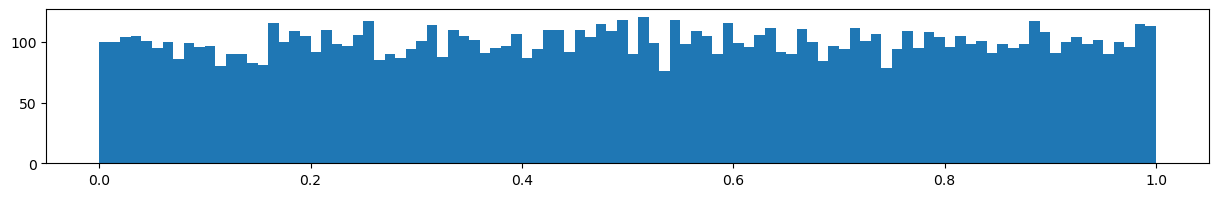

In [407]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=100)
plt.show()

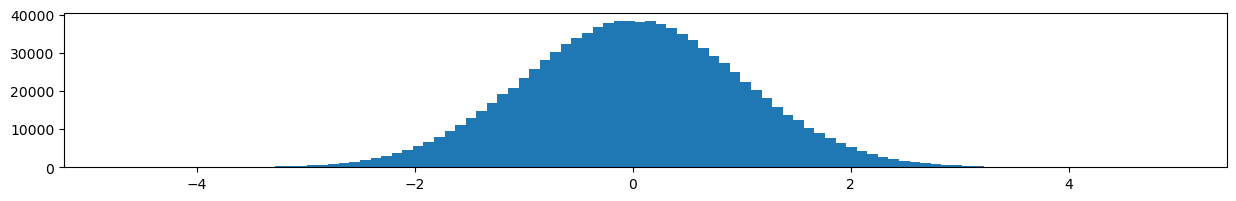

In [415]:
x = np.random.randn(1000000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins=100)
plt.show()

In [468]:
# 2차원 난수 배열
np.random.seed(12) 
np.random.random( (2, 5) ) # 0부터 1미만 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [469]:
np.random.uniform(-1, 10, (2, 5)) # -1 - 10 미만의 균등분포 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [470]:
np.random.normal(10,2,(2,5)) 

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype) : from부터 stop앞까지 by씩 증감하는 정수 배열
- np.linspace(from, to, count) : from부터 to까지(to포함) count개 숫자를 1차원 배열

In [471]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

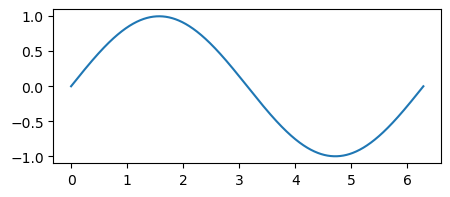

In [475]:
# linspace : 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)
plt.figure(figsize=(5,2))
plt.plot(x,y)
plt.show()

## 2.5 배열의 차원 변경하기
- reshape([면수], 행수, 열수) : -1이 올 수도
- resize([면수], 행수, 열수) : -1 불가
- T : 전치행렬로 변환
- traspose(): 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [483]:
a = np.random.random((2,3))
a

array([[0.17756418, 0.9625969 , 0.41925027],
       [0.42405245, 0.46314887, 0.37372315]])

In [484]:
a = np.round(a*10) # round : 반올림 / floor : 내림 / ceil : 올림
a

array([[ 2., 10.,  4.],
       [ 4.,  5.,  4.]])

In [486]:
a = a.reshape(3,2)
a

array([[ 2., 10.],
       [ 4.,  4.],
       [ 5.,  4.]])

In [488]:
a.reshape(2, -1) # -1이 주어지면 해당 차원의 크기가 자동 계산 

array([[ 2., 10.,  4.],
       [ 4.,  5.,  4.]])

In [489]:
a.reshape(6,-1)

array([[ 2.],
       [10.],
       [ 4.],
       [ 4.],
       [ 5.],
       [ 4.]])

In [491]:
a.resize((2,3)) # -1 불가
a

array([[ 2., 10.,  4.],
       [ 4.,  5.,  4.]])